This notebook contains code and results of emotion classification exploration on the final dataset.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
data = pd.read_csv('../../data/results/amazon_final.csv')

In [3]:
# Split the dataset into two parts - real and fake reviews.
amazon_real = data.loc[data['VERACITY'] == 'Real'].copy()
amazon_fake = data.loc[data['VERACITY'] == 'Fake'].copy()

First see how classes compare wrt each emotion.

In [4]:
fake_joy = amazon_fake.loc[amazon_fake['PREDICTION'] == 'joy']
fake_fear = amazon_fake.loc[amazon_fake['PREDICTION'] == 'fear']
fake_neutral = amazon_fake.loc[amazon_fake['PREDICTION'] == 'neutral']
fake_anger = amazon_fake.loc[amazon_fake['PREDICTION'] == 'anger']
fake_sadness = amazon_fake.loc[amazon_fake['PREDICTION'] == 'sadness']

sizes_fake = [len(fake_joy), len(fake_fear), len(fake_neutral), len(fake_anger), len(fake_sadness)]

real_joy = amazon_real.loc[amazon_real['PREDICTION'] == 'joy']
real_fear = amazon_real.loc[amazon_real['PREDICTION'] == 'fear']
real_neutral = amazon_real.loc[amazon_real['PREDICTION'] == 'neutral']
real_anger = amazon_real.loc[amazon_real['PREDICTION'] == 'anger']
real_sadness = amazon_real.loc[amazon_real['PREDICTION'] == 'sadness']

sizes_real = [len(real_joy), len(real_fear), len(real_neutral), len(real_anger), len(real_sadness)]

In [16]:
# Function definition is based on one at https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
def plot_stacked_barchart(data, labels, categories, y_label, x_label, colors, title):
    """
    Plots a stacked bar chart for the provided data and labels.
    Params:
    data - metrics recorded for each category in a 2D list
    labels - name of classes in bar plots
    categories - list of categories for each bar
    y_label - label for y-axis
    x_label - label for x-axis
    colors - list of colors to use in a graph
    title - title of the plot
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)
    plt.figure(figsize = (7,7))
    for i, row_data in enumerate(data):
        color = colors[i]
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=labels[i], color=color))
        cum_size += row_data
        
    plt.xticks(ind, categories)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.title(title)
    plt.xticks(fontsize=14)
    plt.rcParams.update({'font.size': 14})

    for axis in axes:
        for bar in axis:
            w, h = bar.get_width(), bar.get_height()
            plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                     '{}'.format(int(h)), ha="center", va="center")

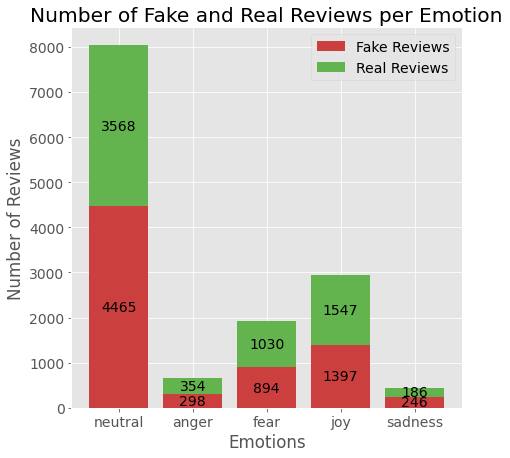

In [17]:
# Plot reviews number next to each other.
emotions = data.PREDICTION.unique()

plot_stacked_barchart(
    data=[sizes_fake, sizes_real], 
    labels = ['Fake Reviews', 'Real Reviews'], 
    categories = emotions, 
    y_label='Number of Reviews',
    x_label='Emotions',
    colors=['#CC3F3F', '#63B44F'],
    title='Number of Fake and Real Reviews per Emotion'
)

Explore correlation on the whole dataset.

In [7]:
joy = data.loc[data['PREDICTION'] == 'joy']
neutral = data.loc[data['PREDICTION'] == 'neutral']
fear = data.loc[data['PREDICTION'] == 'fear']
sadness = data.loc[data['PREDICTION'] == 'sadness']
anger = data.loc[data['PREDICTION'] == 'anger']

In [8]:
print('percentage of real JOY reviews: {:.2f}'.format(len(joy.loc[joy['VERACITY'] == 'Real']) / len(joy) * 100))
print('percentage of real NEUTRAL reviews: {:.2f}'.format(len(neutral.loc[neutral['VERACITY'] == 'Real']) / len(neutral) * 100))
print('percentage of real ANGER reviews: {:.2f}'.format(len(anger.loc[anger['VERACITY'] == 'Real']) / len(anger) * 100))
print('percentage of real SADNESS reviews: {:.2f}'.format(len(sadness.loc[sadness['VERACITY'] == 'Real']) / len(sadness) * 100))
print('percentage of real FEAR reviews: {:.2f}'.format(len(fear.loc[fear['VERACITY'] == 'Real']) / len(fear) * 100))

percentage of real JOY reviews: 44.42
percentage of real NEUTRAL reviews: 53.53
percentage of real ANGER reviews: 52.55
percentage of real SADNESS reviews: 43.06
percentage of real FEAR reviews: 54.29


In [9]:
data_copy = data.copy()
data_copy['VERACITY'] = data_copy['VERACITY'].map({'Fake': 0, 'Real': 1})

In [10]:
joyc = stats.pointbiserialr(data_copy['VERACITY'], data_copy['joy'])
print('Correlation coefficient for JOY {:.3f}\t\tp value {}'.format(joyc[0], joyc[1]))
neutralc = stats.pointbiserialr(data_copy['VERACITY'], data_copy['neutral'])
print('Correlation coefficient for NEUTRAL {:.3f}\tp value {}'.format(neutralc[0], neutralc[1]))
angerc = stats.pointbiserialr(data_copy['VERACITY'], data_copy['anger'])
print('Correlation coefficient for ANGER {:.3f}\t\tp value {}'.format(angerc[0], angerc[1]))
sadnessc = stats.pointbiserialr(data_copy['VERACITY'], data_copy['sadness'])
print('Correlation coefficient for SADNESS {:.3f}\tp value {}'.format(sadnessc[0], sadnessc[1]))
fearc = stats.pointbiserialr(data_copy['VERACITY'], data_copy['fear'])
print('Correlation coefficient for FEAR {:.3f}\t\tp value {}'.format(fearc[0], fearc[1]))

Correlation coefficient for JOY -0.088		p value 1.152942816625494e-25
Correlation coefficient for NEUTRAL 0.059	p value 2.3418278582532765e-12
Correlation coefficient for ANGER 0.058		p value 9.255167645605053e-12
Correlation coefficient for SADNESS -0.003	p value 0.6927863082794349
Correlation coefficient for FEAR 0.049		p value 6.5277282988059855e-09


Now, explore average emotion values.

In [11]:
print('Processing JOY reviews')
print('Full data average joy probability:\t\t{:.2f}'.format(data.joy.mean()))
print('Real reviews average joy probability:\t\t{:.2f}'.format(amazon_real.joy.mean()))
print('Fake reviews average joy probability:\t\t{:.2f}'.format(amazon_fake.joy.mean()))
print()
print('Processing NEUTRAL reviews')
print('Full data average neutral probability:\t\t{:.2f}'.format(data.neutral.mean()))
print('Real reviews average neutral probability:\t{:.2f}'.format(amazon_real.neutral.mean()))
print('Fake reviews average neutral probability:\t{:.2f}'.format(amazon_fake.neutral.mean()))
print()
print('Processing ANGER reviews')
print('Full data average anger probability:\t\t{:.2f}'.format(data.anger.mean()))
print('Real reviews average anger probability:\t\t{:.2f}'.format(amazon_real.anger.mean()))
print('Fake reviews average anger probability:\t\t{:.2f}'.format(amazon_fake.anger.mean()))
print()
print('Processing SADNESS reviews')
print('Full data average sadness probability:\t\t{:.2f}'.format(data.sadness.mean()))
print('Real reviews average sadness probability:\t{:.2f}'.format(amazon_real.sadness.mean()))
print('Fake reviews average sadness probability:\t{:.2f}'.format(amazon_fake.sadness.mean()))
print()
print('Processing FEAR reviews')
print('Full data average fear probability:\t\t{:.2f}'.format(data.fear.mean()))
print('Real reviews average fear probability:\t\t{:.2f}'.format(amazon_real.fear.mean()))
print('Fake reviews average fear probability:\t\t{:.2f}'.format(amazon_fake.fear.mean()))

Processing JOY reviews
Full data average joy probability:		0.50
Real reviews average joy probability:		0.47
Fake reviews average joy probability:		0.53

Processing NEUTRAL reviews
Full data average neutral probability:		0.16
Real reviews average neutral probability:	0.17
Fake reviews average neutral probability:	0.15

Processing ANGER reviews
Full data average anger probability:		0.19
Real reviews average anger probability:		0.20
Fake reviews average anger probability:		0.18

Processing SADNESS reviews
Full data average sadness probability:		0.07
Real reviews average sadness probability:	0.07
Fake reviews average sadness probability:	0.07

Processing FEAR reviews
Full data average fear probability:		0.09
Real reviews average fear probability:		0.10
Fake reviews average fear probability:		0.09


Now, explore average values for data classified as that emotion.

In [12]:
for emotion in emotions:
    data_emotion = data.loc[data['PREDICTION'] == emotion]
    print('Average {} probability on full dataset:\t{:.2f}'.format(emotion, data_emotion[emotion].mean()))
    data_emotion_real = amazon_real.loc[amazon_real['PREDICTION'] == emotion]
    print('Average {} probability on Real reviews:\t{:.2f}'.format(emotion, data_emotion_real[emotion].mean()))
    data_emotion_fake = amazon_fake.loc[amazon_fake['PREDICTION'] == emotion]
    print('Average {} probability on Fake reviews:\t{:.2f}'.format(emotion, data_emotion_fake[emotion].mean()))
    print()

Average neutral probability on full dataset:	0.59
Average neutral probability on Real reviews:	0.59
Average neutral probability on Fake reviews:	0.58

Average anger probability on full dataset:	0.61
Average anger probability on Real reviews:	0.61
Average anger probability on Fake reviews:	0.61

Average fear probability on full dataset:	0.71
Average fear probability on Real reviews:	0.70
Average fear probability on Fake reviews:	0.72

Average joy probability on full dataset:	0.78
Average joy probability on Real reviews:	0.77
Average joy probability on Fake reviews:	0.79

Average sadness probability on full dataset:	0.71
Average sadness probability on Real reviews:	0.71
Average sadness probability on Fake reviews:	0.72



Check if median values significantly differe from mean probabilities.

In [13]:
for emotion in emotions:
    data_emotion = data.loc[data['PREDICTION'] == emotion]
    if emotion == 'joy':
        print('Median {} probability on full dataset:\t\t{:.2f}'.format(emotion, data_emotion[emotion].median()))
        data_emotion_real = amazon_real.loc[amazon_real['PREDICTION'] == emotion]
        print('Median {} probability on Real reviews:\t\t{:.2f}'.format(emotion, data_emotion_real[emotion].median()))
        data_emotion_fake = amazon_fake.loc[amazon_fake['PREDICTION'] == emotion]
        print('Median {} probability on Fake reviews:\t\t{:.2f}'.format(emotion, data_emotion_fake[emotion].median()))
        print()
        continue
    print('Median {} probability on full dataset:\t{:.2f}'.format(emotion, data_emotion[emotion].median()))
    data_emotion_real = amazon_real.loc[amazon_real['PREDICTION'] == emotion]
    print('Median {} probability on Real reviews:\t{:.2f}'.format(emotion, data_emotion_real[emotion].median()))
    data_emotion_fake = amazon_fake.loc[amazon_fake['PREDICTION'] == emotion]
    print('Median {} probability on Fake reviews:\t{:.2f}'.format(emotion, data_emotion_fake[emotion].median()))
    print()

Median neutral probability on full dataset:	0.58
Median neutral probability on Real reviews:	0.59
Median neutral probability on Fake reviews:	0.57

Median anger probability on full dataset:	0.61
Median anger probability on Real reviews:	0.61
Median anger probability on Fake reviews:	0.61

Median fear probability on full dataset:	0.70
Median fear probability on Real reviews:	0.69
Median fear probability on Fake reviews:	0.71

Median joy probability on full dataset:		0.79
Median joy probability on Real reviews:		0.77
Median joy probability on Fake reviews:		0.80

Median sadness probability on full dataset:	0.73
Median sadness probability on Real reviews:	0.72
Median sadness probability on Fake reviews:	0.74

